There are total 13 number of columns
There are total 69301 number of rows
There are total 0 missing values
Features are:
Unique values in each feature 
  id             69301
age             8069
gender             2
height           108
weight           285
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64


{'C': 901101.8251665037}
the accuracy of the test data 0.6793835853630382
the recall of the test data 0.6481225524072795
the precision of the test data 0.6923834133136458
the f1_score of the test data 0.6695222797310965
the confusion maxtix of the test data [[6144 2500]
 [3055 5627]]

 Classification report : 
               precision    recall  f1-score   support

           0       0.67      0.71      0.69      8644
           1       0.69      0.65      0.67      8682

    accuracy                           0.68     17326
   macro avg       0.68      0.68      0.68     17326
weighted avg       0.68      0.68      0.68     17326

Logistic: ROC AUC=0.743


<Figure size 720x360 with 0 Axes>

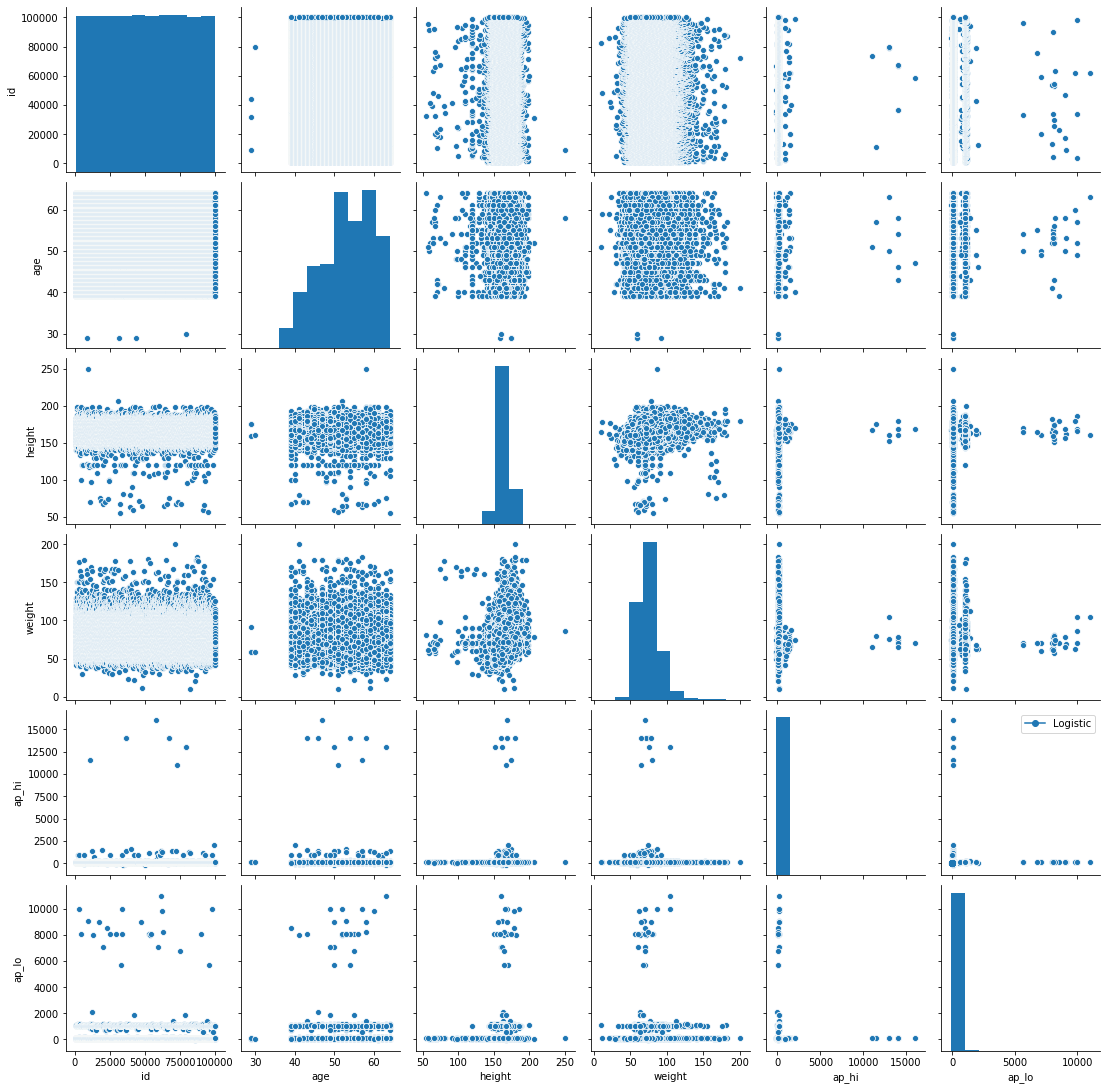

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 53.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 119.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 170.4min finished


{'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}


In [9]:
#!/usr/bin/env python
# coding: utf-8

# In[77]:


import numpy as np
import pandas as pd
import os
import plotly.offline as py
import plotly.graph_objs as go
import cufflinks as clf
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
py.init_notebook_mode(connected=True)#visualization


# In[71]:


#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization


# In[132]:


cardio = pd.read_csv('c:\\cardio_train.csv')


# In[133]:


cardio.head()


# In[134]:


#data overview

print('There are total {} number of columns'.format(cardio.shape[1]))
print('There are total {} number of rows'.format(cardio.shape[0]))
print('There are total {} missing values'.format(cardio.isnull().sum().values.sum()))
print('Features are:'.format(cardio.columns))
print('Unique values in each feature \n ',cardio.nunique())


# In[ ]:


#data Manupulation


# In[90]:


cardio.groupby('gender')['height'].mean()


# In[135]:


card_df = cardio.copy(deep = 'all')


# In[137]:


cardio.head()


# In[136]:


#convertin the age column into years 
card_df['age'] = card_df['age']/365

#converting the age to int value
card_df['age'] = card_df['age'].astype(int)

#mapping the gender column to male and female
m_fmap = {1:'female',2:'male'}
card_df['gender'] = card_df['gender'].map(m_fmap)

#mapping the cholestoral into the different level
ch_map ={1: 'normal', 2: 'above normal', 3: 'well above normal' }
card_df['cholesterol'] = card_df['cholesterol'].map(ch_map)

#mapping the glucose into different level
glu_map ={1: 'normal', 2: 'above normal', 3: 'well above normal' }
card_df['gluc'] = card_df['gluc'].map(ch_map)

#mapping the smoking into yes or no
sm_map = {0: 'no', 1: 'yes' }
card_df['smoke'] = card_df['smoke'].map(sm_map)

#mapping the alco into yes or no
alc_map = {0: 'no', 1: 'yes' }
card_df['alco'] = card_df['alco'].replace(alc_map)

#mapping the physical activity into yes or no
phy_map = {0: 'no', 1: 'yes' }
card_df['active'] = card_df['active'].map(phy_map)

#mapping the physical activity into yes or no
chard_map = {0: 'no', 1: 'yes' }
card_df['cardio'] = card_df['cardio'].map(chard_map)

# converting into age group 
def age_group(data):
    if data >=30 and data<35:
        return '30-35'
    if data >=35 and data<40:
        return '35-40'
    if data >=40 and data<45:
        return '40-45'
    if data >=45 and data<50:
        return '45-50'
    if data >=50 and data<55:
        return '50-55'
    if data >=55 and data<60:
        return '55-60'
    if data >=60 and data<65:
        return '60-65'
    
card_df['age_group'] = card_df['age'].apply(age_group)




#Separating cardio and non cardio customers
cardio     = card_df[card_df["cardio"] == "yes"]
not_cardio = card_df[card_df["cardio"] == "no"]

#Separating catagorical and numerical columns
id_col = ['id']
target_col = ["cardio"]
cat_cols   = card_df.nunique()[card_df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col+['age_group']]
num_cols   = [x for x in card_df.columns if x not in cat_cols + target_col+id_col+['age_group']]
    


card_df.head()



#Exploration of data

lab = card_df["cardio"].value_counts().keys().tolist()
#values
val = card_df["cardio"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Cardio patient in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)


# In[118]:


#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = cardio[column].value_counts().values.tolist(),
                    labels  = cardio[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "cardio patients",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_cardio[column].value_counts().values.tolist(),
                    labels  = not_cardio[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non cardio patients" 
                   )


    layout = go.Layout(dict(title = column + " distribution in cardio diesase ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "cardio patients",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non cardio patients",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)


#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = cardio[column],
                          histnorm= "percent",
                          name = "Cardio patients",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                          nbinsx = 50,
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_cardio[column],
                          histnorm = "percent",
                          name = "Non cadio patients",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          nbinsx = 50,
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in cardio patients ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df):
    plt.figure(figsize=(10,5))
    sns.pairplot(df)

#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)

#scatter plot matrix
scatter_matrix(card_df)


# In[119]:


#cardio dieasese in different age gorup

tg_ch  =  cardio["age_group"].value_counts().reset_index()
tg_ch.columns  = ["age_group","count"]
tg_nch =  not_cardio["age_group"].value_counts().reset_index()
tg_nch.columns = ["age_group","count"]

#bar - cardio
trace1 = go.Bar(x = tg_ch["age_group"]  , y = tg_ch["count"],
                name = "cardio patients",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

#bar - not cardio
trace2 = go.Bar(x = tg_nch["age_group"] , y = tg_nch["count"],
                name = "Not cardio patients",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

layout = go.Layout(dict(title = "patients in different age groups",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "age group",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "count",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )
data = [trace1,trace2]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)


# In[120]:


#Data Preprocession 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

cardio.head()


# In[146]:


cardio = pd.read_csv('C:\\cardio_train.csv')


# In[147]:


cardio['age'] = cardio['age']/365


# In[149]:


cardio['age'] = cardio['age'].astype(int)


# In[150]:


cardio.head()


# In[151]:


cardio.drop('id',inplace = True,axis = 1)


# In[153]:


#converting the gender to binary

cardio['gender'] = cardio['gender'].replace({1:0,2:1})


# In[154]:


cardio.head()


# In[156]:


#minmaxscaler
from sklearn.preprocessing import MinMaxScaler


# In[175]:


feature_col = [feature for feature in cardio.columns if feature not in ['cardio','active','alco','smoke','gluc','cholesterol','gender']]
target_col = ['cardio']
rest_col = [i for i in cardio.columns if i not in feature_col]


# In[166]:


min_max =  MinMaxScaler()

scaled = min_max.fit_transform(cardio[feature_col])


# In[169]:


X_scaled = pd.DataFrame(scaled,columns = feature_col)


# In[177]:


X_scaled


# In[179]:


card_trs = X_scaled.merge(cardio[rest_col],how = 'left',left_index= True,right_index = True)


# In[180]:


card_trs.head()


# In[187]:


card_trs.describe().T.reset_index()


# In[189]:


#correlation
correlation = card_trs.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)


# In[258]:


#Model Building with logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_curve,roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn import svm


# In[278]:


# triying with logistic regression

# Necessary imports 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV 
  
# Creating the hyperparameter grid 
c_space = np.logspace(-5, 15, 200) 
param_grid = {'C': c_space} 
  
# Instantiating logistic regression classifier 
logreg = LogisticRegression() 


X = card_trs.loc[:,[i for i in card_trs.columns if i not in ['cardio']]]
Y = card_trs.loc[:,'cardio']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25)
  
# Instantiating the GridSearchCV object 
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5) 
  
logreg_cv.fit(X_train, Y_train) 


# In[280]:


print(logreg_cv.best_params_)


# In[281]:


# Training the model with this parameter
logit_model = LogisticRegression(penalty = 'l2', C = 901101,random_state = 0)
logit_model.fit(X_train, Y_train)
y_pred = logit_model.predict(X_test)
print('the accuracy of the test data',str(accuracy_score(Y_test,y_pred)))
print('the recall of the test data',str(recall_score(Y_test,y_pred)))
print('the precision of the test data',str(precision_score(Y_test,y_pred)))
print('the f1_score of the test data',str(f1_score(Y_test,y_pred)))
print('the confusion maxtix of the test data',confusion_matrix(Y_test,y_pred))




# roc curve and auc
y_prob_prob = logit_model.predict_proba(X_test)[:,1]
fpr,tpr,tresh= roc_curve(Y_test,y_prob_prob)
score = roc_auc_score(Y_test,y_prob_prob)
print ("\n Classification report : \n",classification_report(Y_test,y_pred ))
# calculate scores
lr_auc = roc_auc_score(Y_test, y_prob_prob)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='o', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()



from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Criteria of chossing a node
criterion=['gini','entropy']
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'criterion':criterion,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)
print(rf_random.best_params_)







In [13]:
# traing the random forest model with the best parameter from random search to the training data

Random_rf = RandomForestClassifier(n_estimators= 800, min_samples_split= 10, min_samples_leaf= 1, max_features= 'auto', max_depth= 10)
random_Forest_model = Random_rf.fit(X_train, Y_train)



 Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.80      0.75      8644
           1       0.77      0.68      0.72      8682

    accuracy                           0.74     17326
   macro avg       0.74      0.74      0.74     17326
weighted avg       0.74      0.74      0.74     17326

Logistic: ROC AUC=0.807


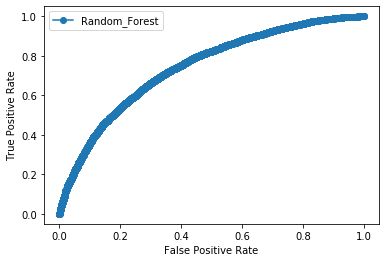

In [17]:
# roc curve and auc
RF_y_pred = random_Forest_model.predict_proba(X_test)[:,1]
RF_fpr,RF_tpr,RF_tresh= roc_curve(Y_test,y_prob_prob)
RF_score = roc_auc_score(Y_test,RF_y_pred)
Y_pred = random_Forest_model.predict(X_test)
print ("\n Classification report : \n",classification_report(Y_test,Y_pred ))
# calculate scores
RF_auc = roc_auc_score(Y_test, RF_y_pred)
print('Logistic: ROC AUC=%.3f' % (RF_auc))
# plot the roc curve for the model
plt.plot(RF_fpr, RF_tpr, marker='o', label='Random_Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [22]:
#using ADA boost classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
ada=AdaBoostClassifier()
search_grid={'n_estimators':[100,150,200,250,300],'learning_rate':[.001,0.01,.1],'random_state':[1]}
Ada_boost_model=GridSearchCV(estimator=ada,param_grid=search_grid,n_jobs=1,cv=5)

ADA_model = Ada_boost_model.fit(X_train,Y_train)
 

In [29]:
#traning with the best parameter
Ada=AdaBoostClassifier(learning_rate= 0.1, n_estimators= 300, random_state= 1)

final_ada_model = Ada.fit(X_train,Y_train)

In [25]:
ADA_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 1}


 Classification report : 
               precision    recall  f1-score   support

           0       0.70      0.82      0.75      8644
           1       0.78      0.65      0.71      8682

    accuracy                           0.73     17326
   macro avg       0.74      0.73      0.73     17326
weighted avg       0.74      0.73      0.73     17326

Logistic: ROC AUC=0.807


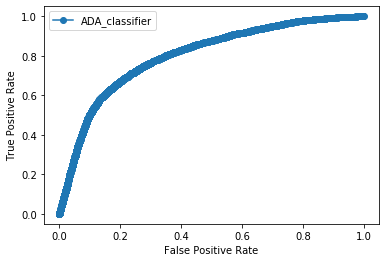

In [31]:

# roc curve and auc
AD_y_prob = final_ada_model.predict_proba(X_test)[:,1]
AD_fpr,AD_tpr,AD_tresh= roc_curve(Y_test,AD_y_prob)
AD_score = roc_auc_score(Y_test,AD_y_pred)
AD_Y_pred = final_ada_model.predict(X_test)
print ("\n Classification report : \n",classification_report(Y_test,AD_Y_pred ))
# calculate scores
AD_auc = roc_auc_score(Y_test, AD_y_pred)
print('Logistic: ROC AUC=%.3f' % (RF_auc))
# plot the roc curve for the model
plt.plot(AD_fpr, AD_tpr, marker='o', label='ADA_classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [35]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}

GBC = GridSearchCV(gbc,parameters,cv=5)
GBC.fit(X_train,Y_train)
print(GBC.best_params_)


KeyboardInterrupt: 

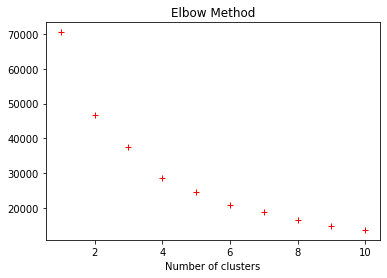

In [40]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,'r+')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel
plt.show()

In [39]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_train)


AttributeError: module 'seaborn' has no attribute 'scatter'